In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from prophet import Prophet

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


mae: 4471.751916921047
RMSE: 5260.7670452262855


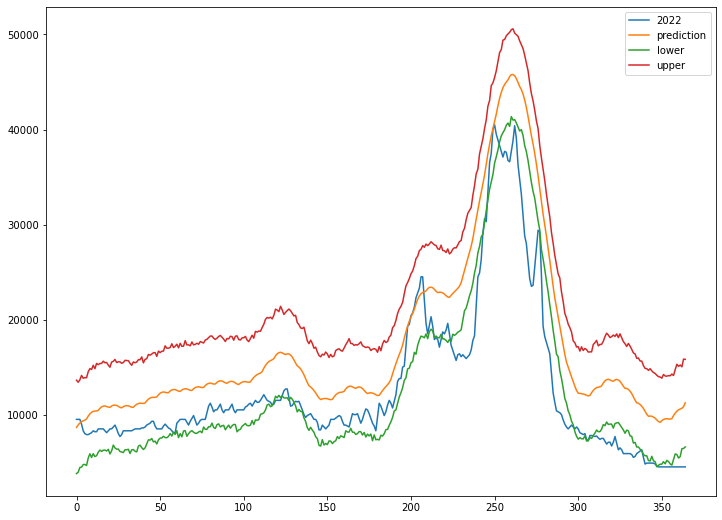

In [4]:
df = pd.read_csv('+22년se배추_het.csv', encoding='cp949')
df['ds'] = pd.to_datetime(df['ds'])
test_df = df['y'].tail(365).reset_index(drop=True)

df['cap'] = (df['y'].max()*2)
df['floor'] = (df['y'].min()/2)
model_het = Prophet(growth='logistic',
    n_changepoints=25,
    changepoint_prior_scale=0.02,
    seasonality_prior_scale=10,
    #seasonality_mode='additive',
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    daily_seasonality=True,)
model_het.fit(df)

future = model_het.make_future_dataframe(periods=365)
future['cap'] = (df['y'].max()*2)
future['floor'] = (df['y'].min()/2)

forecast = model_het.predict(future)
pred_het = forecast['yhat'].tail(365).reset_index(drop=True)
lower = forecast['yhat_lower'].tail(365).reset_index(drop=True)
upper = forecast['yhat_upper'].tail(365).reset_index(drop=True)


from sklearn.metrics import mean_absolute_error
print('mae:',mean_absolute_error(test_df, pred_het))
print('RMSE:', mean_squared_error(test_df, pred_het)**0.5)
# 모델 저장 코드
# import joblib
# joblib.dump(model_het, 'model/se_배추_prophet10.pkl')

#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(df['y'].tail(365).reset_index(drop=True), label = '2022')
plt.plot(pred_het, label = 'prediction')
plt.plot(lower, label = 'lower')
plt.plot(upper, label = 'upper')
plt.legend()
plt.show()

In [ ]:
############################################################################################################

In [ ]:
############################################################################################################

In [ ]:
############################################################################################################

In [ ]:
############################################################################################################

In [5]:
df['ds'] = pd.to_datetime(df['ds'])

In [6]:
df

,ds,y
0,2019-01-01,4585.0
1,2019-01-02,4620.0
2,2019-01-03,4620.0
3,2019-01-04,4620.0
4,2019-01-05,4620.0
...,...,...
1091,2021-12-27,7670.0
1092,2021-12-28,7830.0
1093,2021-12-29,8000.0
1094,2021-12-30,8170.0


In [4]:
x=df.drop(columns='배추가격')
y=df['배추가격']
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2)

In [5]:
train_x.shape

(2337, 7)

In [6]:
model_li = LinearRegression()
model_li.fit(train_x,train_y)

LinearRegression()

In [7]:
pred = model_li.predict(test_x)
print('RMSE:', mean_squared_error(test_y, pred)**0.5)
print(round(r2_score(test_y, pred),5))

RMSE: 3544.976826196615
0.51586


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble

In [9]:
model_rf = RandomForestRegressor(n_estimators=200,max_depth=30, min_samples_leaf=1, min_samples_split=2,n_jobs=-1)
model_rf.fit(train_x,train_y)
pred = model_rf.predict(test_x)
print('RMSE:', mean_squared_error(test_y, pred)**0.5)
print(round(r2_score(test_y, pred),5))

RMSE: 330.0740031380914
0.9958


In [10]:
model_gb = ensemble.GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,max_depth=10)
model_gb.fit(train_x,train_y)
pred = model_gb.predict(test_x)
print('RMSE:', mean_squared_error(test_y, pred)**0.5)
print(round(r2_score(test_y, pred),5))

RMSE: 207.28010981743847
0.99834


In [7]:
test_df = pd.read_csv('22_가격동향_배추.csv',encoding='utf-8')
test_df = test_df.interpolate(method='linear')
test_df = test_df.fillna(method='bfill')
test_df['일자'] = test_df['일자'].apply(lambda x: pd.to_datetime(str(x),format='%Y-%m-%d'))
con_2022 = test_df[['일자','부산\n단위 (원)']].copy()
con_2022.rename(columns = {'일자' : 'ds','부산\n단위 (원)' : 'y'}, inplace = True)
df = pd.concat([df,con_2022]).reset_index(drop=True)
df.to_csv('train/+22년bu배추_het.csv',encoding='cp949',index=False)
df

,ds,y
0,2019-01-01,4585.0
1,2019-01-02,4620.0
2,2019-01-03,4620.0
3,2019-01-04,4620.0
4,2019-01-05,4620.0
...,...,...
1456,2022-12-27,5160.0
1457,2022-12-28,5160.0
1458,2022-12-29,5160.0
1459,2022-12-30,5160.0


In [30]:
pred_rf = model_rf.predict(x_t)
print('RMSE:', mean_squared_error(test_df, pred_rf)**0.5)
print(round(r2_score(test_df, pred_rf),5))

RMSE: 7840.775872229759
0.0599


In [31]:
pred_gb = model_gb.predict(x_t)
print('RMSE:', mean_squared_error(test_df, pred_gb)**0.5)
print(round(r2_score(test_df, pred_gb),5))

RMSE: 8281.405137296495
-0.04873


In [32]:
pred_lstm = model.predict(x_t)
print('RMSE:', mean_squared_error(test_df, pred_lstm)**0.5)
print(round(r2_score(test_df, pred_lstm),5))

12/12 [==============================] - 0s 2ms/step
RMSE: 8974.079383095263
-0.2315


In [153]:
import joblib
joblib.dump(model_het, 'se_배추_prophet10.pkl')

['se_배추_prophet15.pkl']

In [88]:
df['cap'] = (df['y'].max()*2)
df['floor'] = (df['y'].min()/2)

In [89]:
model_het = Prophet(growth='logistic',
    n_changepoints=25,
    changepoint_prior_scale=0.02,
    seasonality_prior_scale=10,
    #seasonality_mode='additive',
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    daily_seasonality=True,)
model_het.fit(df)

In [90]:
future = model_het.make_future_dataframe(periods=365)

In [91]:
future['cap'] = (df['y'].max()*2)
future['floor'] = (df['y'].min()/2)

In [92]:
forecast = model_het.predict(future)
pred_het = forecast['yhat'].tail(365).reset_index(drop=True)
from sklearn.metrics import mean_absolute_error
#print('mae:',mean_absolute_error(test_df/10, pred_het/10))
#print('RMSE:', mean_squared_error(test_df/10, pred_het/10)**0.5)

In [93]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365)

,ds,yhat,yhat_lower,yhat_upper
1461,2023-01-01,8669.970844,4284.549661,13249.674074
1462,2023-01-02,8845.952390,4408.298281,13200.590969
1463,2023-01-03,8897.178047,4450.648380,13357.796277
1464,2023-01-04,8949.367527,4502.060258,13370.157261
1465,2023-01-05,8955.966481,4585.304614,13165.253065
...,...,...,...,...
1821,2023-12-27,10010.849356,5509.882942,14764.616889
1822,2023-12-28,10077.228578,5264.181557,14625.181542
1823,2023-12-29,10092.816551,5604.092147,14206.540170
1824,2023-12-30,10164.709026,5908.698619,14231.352710


In [96]:
pred2023 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365).reset_index(drop=True).copy()
pred2023.to_csv('gw_배추_2023.csv',encoding='cp949',index=False)
import joblib
joblib.dump(model_het, 'model/gw_배추_prophet10.pkl')

['model/gw_배추_prophet10.pkl']

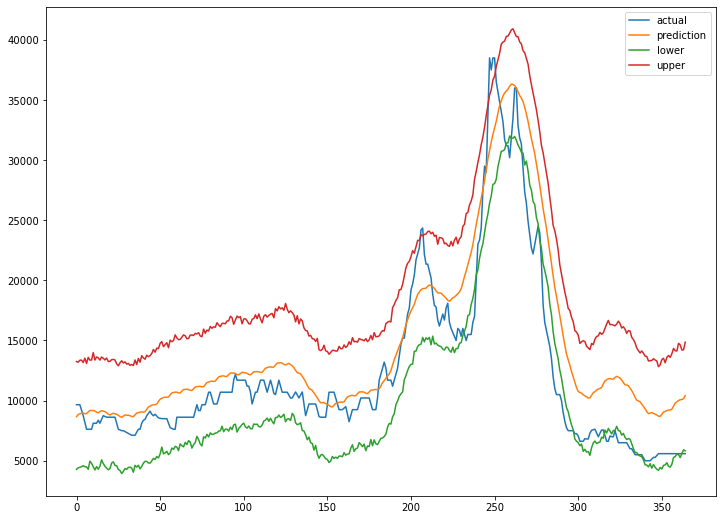

In [95]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(test_df['광주\n단위 (원)'], label = 'actual')
plt.plot(pred_het, label = 'prediction')
plt.plot(forecast['yhat_lower'].tail(365).reset_index(drop=True), label = 'lower')
plt.plot(forecast['yhat_upper'].tail(365).reset_index(drop=True), label = 'upper')
plt.legend()
plt.show()

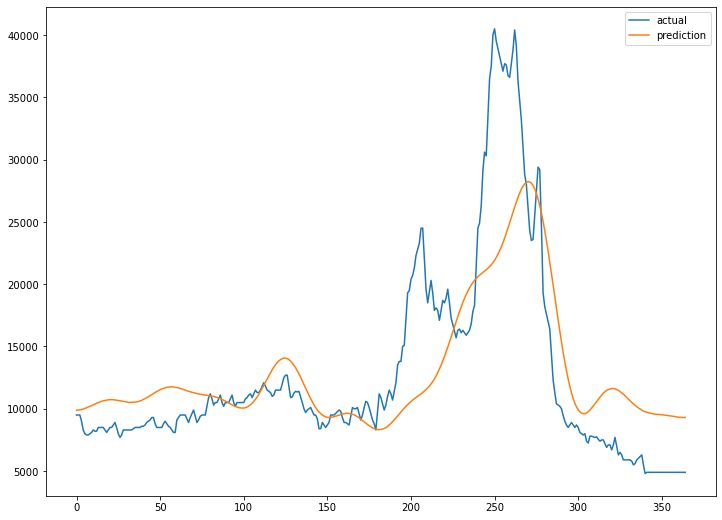

In [152]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(test_df, label = 'actual')
plt.plot(pred_het, label = 'prediction')
plt.legend()
plt.show()

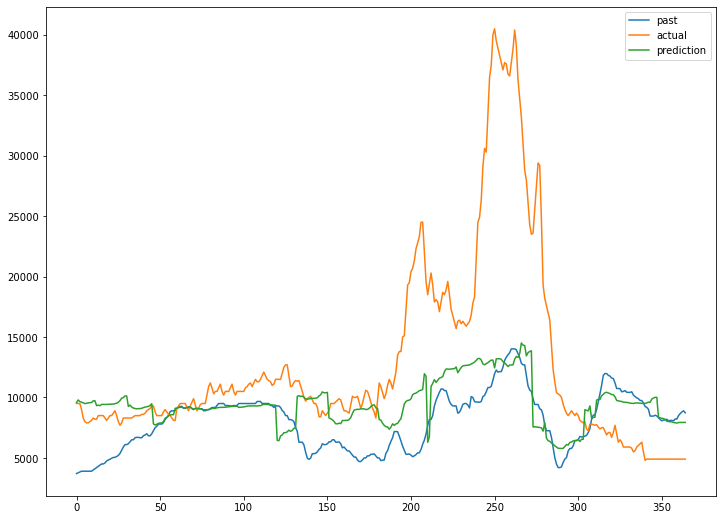

In [35]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(i, label = 'past')
plt.plot(test_df, label = 'actual')
plt.plot(pred_rf, label = 'prediction')
plt.legend()
plt.show()

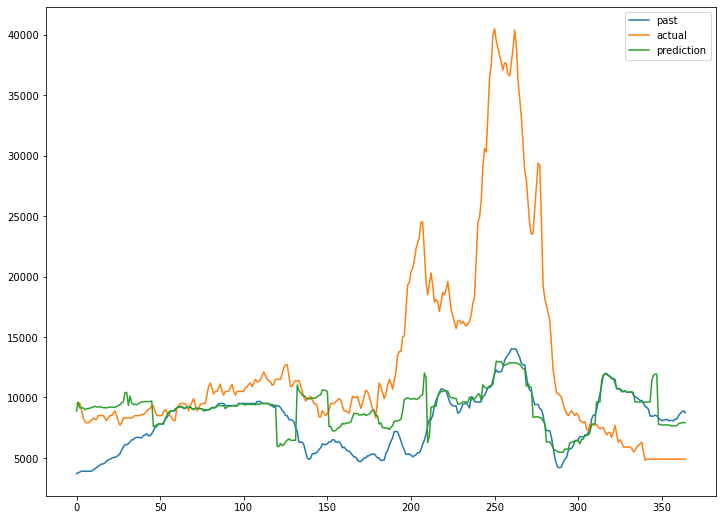

In [36]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(i, label = 'past')
plt.plot(test_df, label = 'actual')
plt.plot(pred_gb, label = 'prediction')
plt.legend()
plt.show()

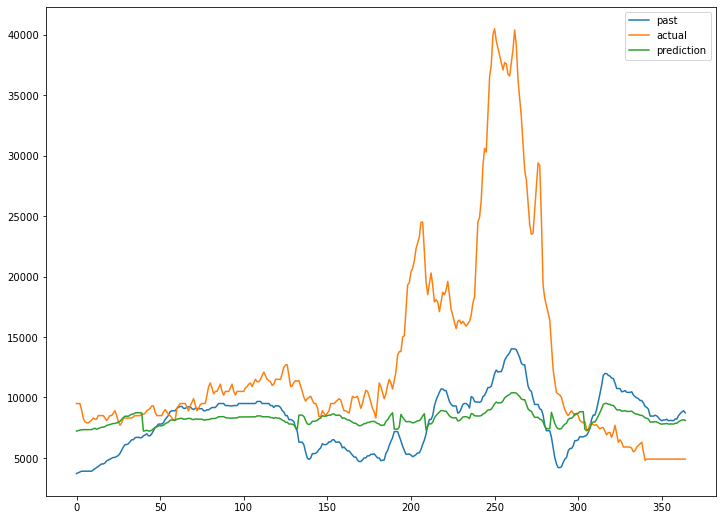

In [37]:
#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(i, label = 'past')
plt.plot(test_df, label = 'actual')
plt.plot(pred_lstm, label = 'prediction')
plt.legend()
plt.show()